In [6]:
import networks as nx
import numpy as np
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [7]:
from adiaframe import Hamiltonian

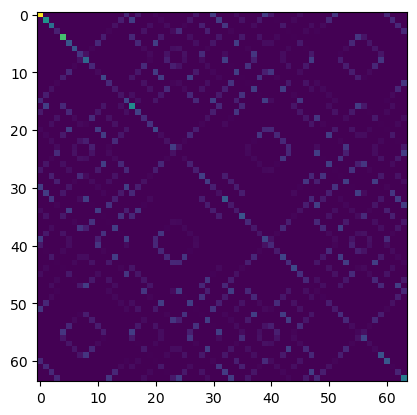

In [8]:
from random import random
# Test with real Hamiltonian terms
pstrs = pd.read_csv("H3+-2.1_node.csv")["Pstring"]
pauli_sample = {}
for p in pstrs:
    pauli_sample[p] = random()
H = Hamiltonian.p_poly_to_H(pauli_sample)
plt.imshow(np.abs(H))

In [9]:
hamiltonian = Hamiltonian(H, pauli_basis=pauli_sample, commute_map=True)
hamiltonian.local_decomposition.head(15)

/Users/hyunseongkim/Documents/GitHub/Quantum_Computing/modules/AdiaFrame/adiaframe/utils.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = bin(s[0] & s[3]).count("1")%2
/Users/hyunseongkim/Documents/GitHub/Quantum_Computing/modules/AdiaFrame/adiaframe/utils.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = bin(s[1] & s[2]).count("1")%2


,Pstring,type,Z,X,Coef
0,IIIIII,0,0,0,0.350626
1,IIIIIZ,0,1,0,0.588713
2,IIIIZI,0,2,0,0.770947
3,IIIIZZ,0,3,0,0.109788
4,IIIZII,0,4,0,0.446085
5,IIIZIZ,0,5,0,0.135540
6,IIIZZI,0,6,0,0.636051
7,IIZIII,0,8,0,0.921725
8,IIZIIZ,0,9,0,0.892696
9,IIZIZI,0,10,0,0.930466


## Test with Network optimization algorithm

## Kurita et al

## Hyunseong's basis transform weights

## Combination with Pauli-frame method

How to align 
S, H, CNOT weight?